In [1]:
%pip install scikit-learn numpy matplotlib pandas seaborn tabulate

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Display the first 10 rows in a tabulated format
print(tabulate(df.head(1000), headers='keys', tablefmt='psql'))




+-----+---------------------+--------------------+---------------------+--------------------+----------+
|     |   sepal length (cm) |   sepal width (cm) |   petal length (cm) |   petal width (cm) |   target |
|-----+---------------------+--------------------+---------------------+--------------------+----------|
|   0 |                 5.1 |                3.5 |                 1.4 |                0.2 |        0 |
|   1 |                 4.9 |                3   |                 1.4 |                0.2 |        0 |
|   2 |                 4.7 |                3.2 |                 1.3 |                0.2 |        0 |
|   3 |                 4.6 |                3.1 |                 1.5 |                0.2 |        0 |
|   4 |                 5   |                3.6 |                 1.4 |                0.2 |        0 |
|   5 |                 5.4 |                3.9 |                 1.7 |                0.4 |        0 |
|   6 |                 4.6 |                3.4 |     

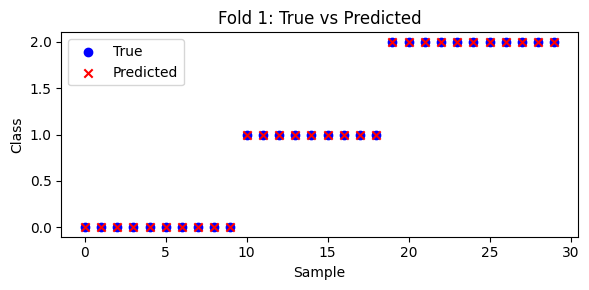

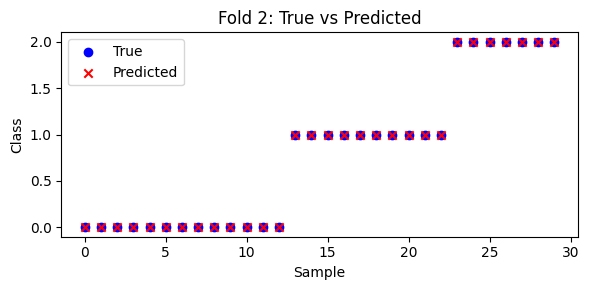

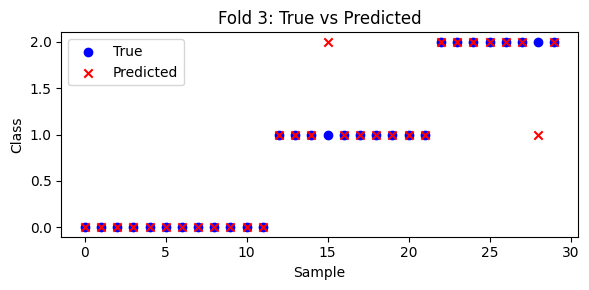

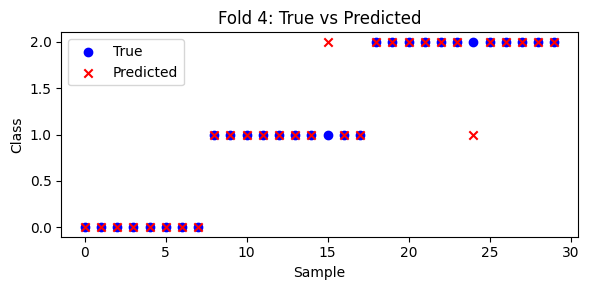

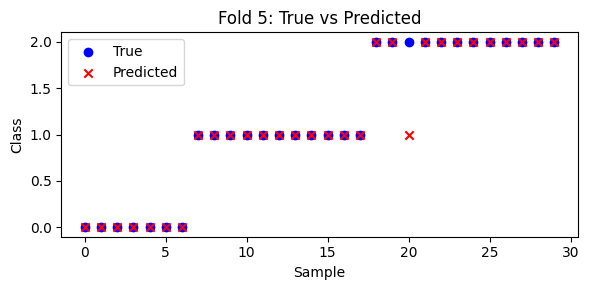

Accuracies for each fold: [1.0, 1.0, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667]
Average accuracy over 5 folds: 0.97


In [3]:

X = iris.data
y = iris.target

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
accuracies = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = SVC()
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    # Plot after each prediction
    plt.figure(figsize=(6, 3))
    plt.scatter(range(len(y_test)), y_test, label='True', marker='o', color='b')
    plt.scatter(range(len(y_pred)), y_pred, label='Predicted', marker='x', color='r')
    plt.title(f'Fold {i+1}: True vs Predicted')
    plt.xlabel('Sample')
    plt.ylabel('Class')
    plt.legend()
    plt.tight_layout()
    plt.show()

print(f'Accuracies for each fold: {accuracies}')
print(f'Average accuracy over {k} folds: {np.mean(accuracies):.2f}')

Christo's Talking Points:
- **When to use K-Fold Cross-Validation**: Use K-Fold when you have a limited dataset and want to ensure that every sample is used for both training and testing. It helps in getting a more reliable estimate of model performance.
- **How K-Fold works**: The dataset is split into K subsets (folds). The model is trained on K-1 folds and tested on the remaining fold. This process is repeated K times, with each fold being used as the test set once.

- Workflow ![Grid Search Workflow](https://scikit-learn.org/stable/_images/grid_search_workflow.png)